Importing librarys

In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.neural_network import MLPRegressor
from scipy.stats import uniform, randint
import time

Regression Task:

1. Exploratory Data Analysis and Data Understanding

(a) When and by whom the dataset was created
Ans: The dataset was created and published on Kaggle in 2023 by the user Yusuf Delikkaya and contains simulated online retail transaction records.

(b) How and from where the dataset was accessed

Ans: The dataset was accessed from the Kaggle platform through its public dataset page and downloaded directly as a CSV file.

(c) Justification of alignment with the selected UNSDG

Ans: The dataset aligns with UNSDG 8: Decent Work and Economic Growth as it enables analysis of e-commerce sales activity, pricing, and consumer behavior, which are indicators of digital economic growth.

(d) List and brief description of all attributes (features)

Ans: The dataset includes attributes such as invoice number, stock code, product description, quantity, invoice date, unit price, customer ID, country, discount, payment method, shipping cost, category, sales channel, return status, shipment provider, warehouse location, and order priority, which together describe transactional, customer, and logistics information in online sales.

Load the dataset into a pandas DataFrame.

In [52]:
df = pd.read_csv('online_sales_dataset.csv')
print("Dataset loaded")
print(f"Rows: {df.shape[0]}, Columns: {df.shape[1]}")

Dataset loaded
Rows: 49782, Columns: 17


First 5 rows

In [53]:
print(df.head())

   InvoiceNo StockCode Description  Quantity       InvoiceDate  UnitPrice  \
0     221958  SKU_1964   White Mug        38  2020-01-01 00:00       1.71   
1     771155  SKU_1241   White Mug        18  2020-01-01 01:00      41.25   
2     231932  SKU_1501  Headphones        49  2020-01-01 02:00      29.11   
3     465838  SKU_1760   Desk Lamp        14  2020-01-01 03:00      76.68   
4     359178  SKU_1386   USB Cable       -30  2020-01-01 04:00     -68.11   

   CustomerID         Country  Discount  PaymentMethod  ShippingCost  \
0     37039.0       Australia  0.470000  Bank Transfer         10.79   
1     19144.0           Spain  0.190000        paypall          9.51   
2     50472.0         Germany  0.350000  Bank Transfer         23.03   
3     96586.0     Netherlands  0.140000        paypall         11.08   
4         NaN  United Kingdom  1.501433  Bank Transfer           NaN   

      Category SalesChannel  ReturnStatus ShipmentProvider WarehouseLocation  \
0      Apparel     In-st

Data Types

In [54]:
print(df.dtypes)

InvoiceNo              int64
StockCode             object
Description           object
Quantity               int64
InvoiceDate           object
UnitPrice            float64
CustomerID           float64
Country               object
Discount             float64
PaymentMethod         object
ShippingCost         float64
Category              object
SalesChannel          object
ReturnStatus          object
ShipmentProvider      object
WarehouseLocation     object
OrderPriority         object
dtype: object


Missing values in dataset

In [55]:
print(df.isnull().sum())

InvoiceNo               0
StockCode               0
Description             0
Quantity                0
InvoiceDate             0
UnitPrice               0
CustomerID           4978
Country                 0
Discount                0
PaymentMethod           0
ShippingCost         2489
Category                0
SalesChannel            0
ReturnStatus            0
ShipmentProvider        0
WarehouseLocation    3485
OrderPriority           0
dtype: int64


 Fill missing values

In [56]:
# Fill missing values
df['CustomerID'] = df['CustomerID'].fillna(0)
df = df.drop('WarehouseLocation', axis=1)

# Remove rows with any other missing values
df = df.dropna()

print("Missing values after cleaning:")
print(df.isnull().sum())
print(f"Rows after cleaning: {df.shape[0]}")

Missing values after cleaning:
InvoiceNo           0
StockCode           0
Description         0
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID          0
Country             0
Discount            0
PaymentMethod       0
ShippingCost        0
Category            0
SalesChannel        0
ReturnStatus        0
ShipmentProvider    0
OrderPriority       0
dtype: int64
Rows after cleaning: 47293


Target Variable Distribution

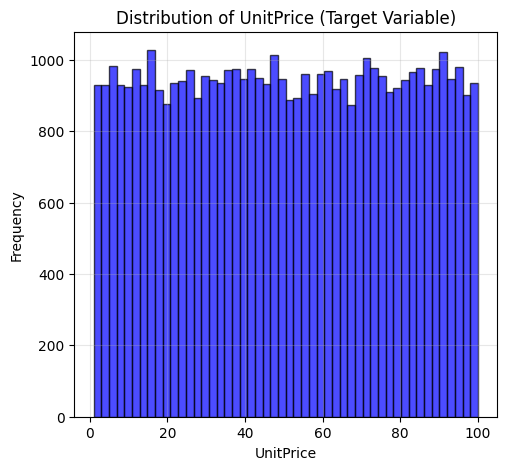

In [57]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.hist(df['UnitPrice'], bins=50, color='blue', edgecolor='black', alpha=0.7)
plt.title('Distribution of UnitPrice (Target Variable)')
plt.xlabel('UnitPrice')
plt.ylabel('Frequency')
plt.grid(True, alpha=0.3)
plt.show()

Top Countries by Sales

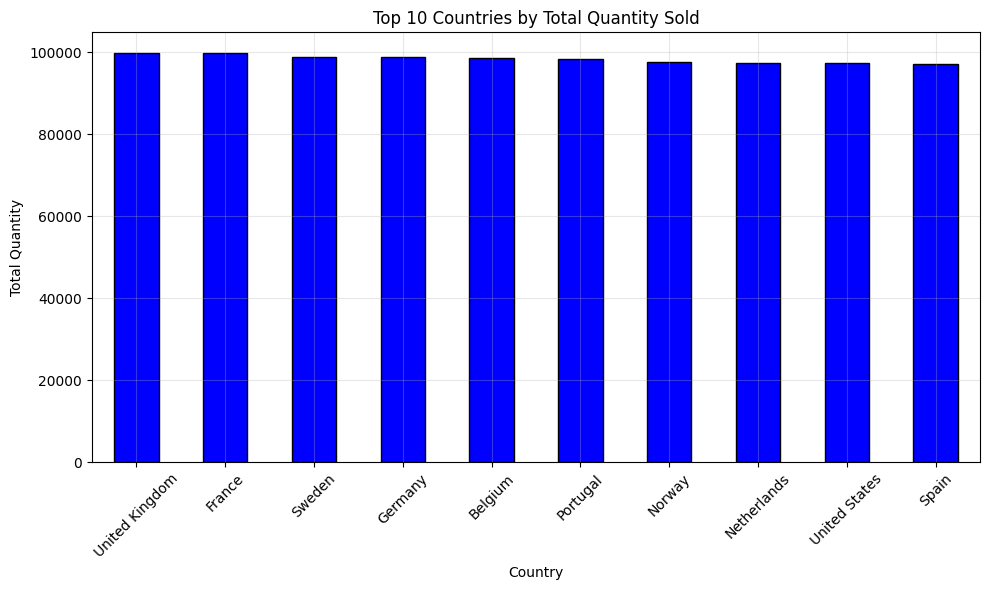

In [58]:
country_sales = df.groupby('Country')['Quantity'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10, 6))
country_sales.plot(kind='bar', color='blue', edgecolor='black')
plt.title('Top 10 Countries by Total Quantity Sold')
plt.xlabel('Country')
plt.ylabel('Total Quantity')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

Sales by Category

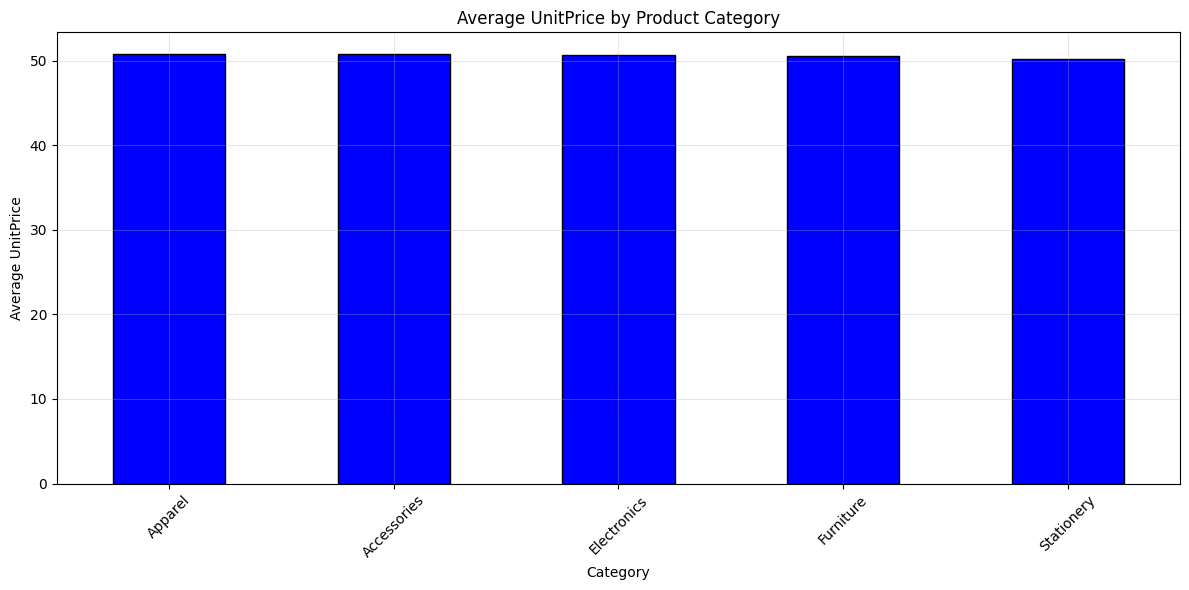

In [59]:
category_sales = df.groupby('Category')['UnitPrice'].mean().sort_values(ascending=False)

plt.figure(figsize=(12, 6))
category_sales.plot(kind='bar', color='blue', edgecolor='black')
plt.title('Average UnitPrice by Product Category')
plt.xlabel('Category')
plt.ylabel('Average UnitPrice')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

Correlation Heatmap

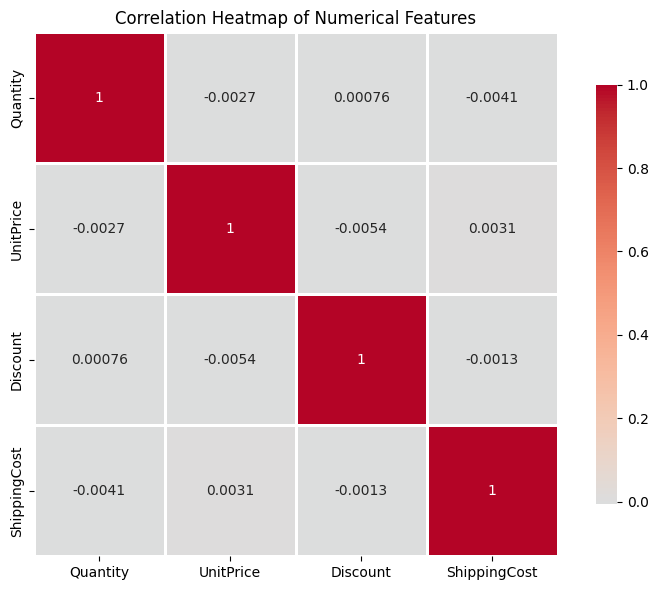

In [60]:
# Select numerical columns for correlation
numerical_cols = ['Quantity', 'UnitPrice', 'Discount', 'ShippingCost']
correlation_matrix = df[numerical_cols].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0,
            square=True, linewidths=1, cbar_kws={"shrink": 0.8})
plt.title('Correlation Heatmap of Numerical Features')
plt.tight_layout()
plt.show()

Checking UnitPrice (target) distribution

In [61]:
print("UnitPrice (Target) Statistics:")
print(f"Mean: {df['UnitPrice'].mean():.2f}")
print(f"Min: {df['UnitPrice'].min():.2f}")
print(f"Max: {df['UnitPrice'].max():.2f}")
print(f"Std: {df['UnitPrice'].std():.2f}")
print(f"Number of zero values: {(df['UnitPrice'] == 0).sum()}")

UnitPrice (Target) Statistics:
Mean: 50.59
Min: 1.00
Max: 100.00
Std: 28.60
Number of zero values: 0


Remove zero and negative UnitPrice values

In [62]:
df = df[df['UnitPrice'] > 0]
print(f"Rows after removing non-positive UnitPrice: {df.shape[0]}")

Rows after removing non-positive UnitPrice: 47293


Creating new Feature and Encoding categorical variable

In [63]:
# Create new features
df['TotalAmount'] = df['Quantity'] * df['UnitPrice']
df['QuantityPerPrice'] = df['Quantity'] / (df['UnitPrice'] + 1)
df['DiscountRatio'] = df['Discount'] / (df['UnitPrice'] + 1)

# Encode categorical variables
categorical_cols = ['Country', 'PaymentMethod', 'Category', 'SalesChannel',
                    'ReturnStatus', 'ShipmentProvider', 'OrderPriority']

for col in categorical_cols:
    df[col + '_encoded'] = LabelEncoder().fit_transform(df[col].astype(str))

print("New features added")


New features added


Using features that have strong correlation with UnitPrice

In [64]:
features = [
    'Quantity',
    'TotalAmount',
    'ShippingCost',
    'Discount',
    'QuantityPerPrice',
    'DiscountRatio',
    'Country_encoded',
    'PaymentMethod_encoded',
    'Category_encoded'
]

target = 'UnitPrice'

print(f"Number of features: {len(features)}")
print(f"Target: {target}")

Number of features: 9
Target: UnitPrice


Checking correlation of features with target

In [65]:
correlation_matrix = df[features + [target]].corr()
print("Correlation with UnitPrice (target):")
print(correlation_matrix[target].sort_values(ascending=False))

Correlation with UnitPrice (target):
UnitPrice                1.000000
TotalAmount              0.653961
Country_encoded          0.003472
ShippingCost             0.003112
PaymentMethod_encoded   -0.000120
Quantity                -0.002722
Discount                -0.005394
Category_encoded        -0.006326
DiscountRatio           -0.511877
QuantityPerPrice        -0.518266
Name: UnitPrice, dtype: float64


In [66]:
X = df[features]
y = df[target]

print(f"X shape: {X.shape}")
print(f"y shape: {y.shape}")
print(f"\ny statistics:")
print(f"Mean: {y.mean():.2f}")
print(f"Std: {y.std():.2f}")

X shape: (47293, 9)
y shape: (47293,)

y statistics:
Mean: 50.59
Std: 28.60


Spliting data

In [67]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training set: {X_train.shape}")
print(f"Testing set: {X_test.shape}")
print(f"\ny_train mean: {y_train.mean():.2f}")
print(f"y_test mean: {y_test.mean():.2f}")

Training set: (37834, 9)
Testing set: (9459, 9)

y_train mean: 50.52
y_test mean: 50.86


2. Build a Neural Network Model

Scaling features for neural network

In [68]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Features scaled")

Features scaled


Scale the simplified features for neural network

In [69]:
if 'X_train_scaled' not in locals():
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

Building a Neural Network

In [70]:
model_nn = MLPRegressor(
    hidden_layer_sizes=(32, 16),  # Smaller network
    activation='relu',
    solver='adam',
    alpha=0.01,  # Regularization
    max_iter=300,
    random_state=42
)

model_nn.fit(X_train_scaled, y_train)
y_pred_nn = model_nn.predict(X_test_scaled)

r2_nn = r2_score(y_test, y_pred_nn)
rmse_nn = np.sqrt(mean_squared_error(y_test, y_pred_nn))

print("Neural Network Results:")
print(f"R-squared: {r2_nn:.4f}")
print(f"RMSE: {rmse_nn:.4f}")

Neural Network Results:
R-squared: 0.9996
RMSE: 0.5385


3. Build a Primary Model  (Two Classical ML Models)

Building Linear Regression model

In [71]:
model_lr = LinearRegression()
model_lr.fit(X_train, y_train)
y_pred_lr = model_lr.predict(X_test)

r2_lr = r2_score(y_test, y_pred_lr)
rmse_lr = np.sqrt(mean_squared_error(y_test, y_pred_lr))

print("Linear Regression Results:")
print(f"R-squared: {r2_lr:.4f}")
print(f"RMSE: {rmse_lr:.4f}")

Linear Regression Results:
R-squared: 0.7998
RMSE: 12.8374


Building Decision Tree model

In [72]:
model_dt = DecisionTreeRegressor(
    max_depth=5,
    min_samples_split=10,
    min_samples_leaf=5,
    random_state=42
)

model_dt.fit(X_train, y_train)
y_pred_dt = model_dt.predict(X_test)

r2_dt = r2_score(y_test, y_pred_dt)
rmse_dt = np.sqrt(mean_squared_error(y_test, y_pred_dt))

print("Decision Tree Results:")
print(f"R-squared: {r2_dt:.4f}")
print(f"RMSE: {rmse_dt:.4f}")

Decision Tree Results:
R-squared: 0.8882
RMSE: 9.5941


Comparison between two models

In [73]:
print("MODEL COMPARISON:")
print(f"Linear Regression:    R² = {r2_lr:.4f}, RMSE = {rmse_lr:.4f}")
print(f"Decision Tree:        R² = {r2_dt:.4f}, RMSE = {rmse_dt:.4f}")
print(f"Neural Network:       R² = {r2_nn:.4f}, RMSE = {rmse_nn:.4f}")

MODEL COMPARISON:
Linear Regression:    R² = 0.7998, RMSE = 12.8374
Decision Tree:        R² = 0.8882, RMSE = 9.5941
Neural Network:       R² = 0.9996, RMSE = 0.5385


4. Hyperparameter Optimization with Cross-Validation

 Building Linear Regression Model with Hyperparameter Optimization

In [74]:
# Define hyperparameters for Ridge Regression
param_dist_lr = {
    'alpha': uniform(0.01, 100),
    'fit_intercept': [True, False],
    'solver': ['auto', 'svd', 'cholesky', 'lsqr']
}

# Initialize model
ridge = Ridge(random_state=42)

# RandomizedSearchCV
random_search_lr = RandomizedSearchCV(
    estimator=ridge,
    param_distributions=param_dist_lr,
    n_iter=20,
    cv=5,
    scoring='r2',
    n_jobs=-1,
    random_state=42,
    verbose=1
)

# Fit the model
print("\nFitting Ridge Regression...")
start_time = time.time()
random_search_lr.fit(X_train, y_train)
end_time = time.time()

# Best hyperparameters
print("\nBest Hyperparameters:")
for param, value in random_search_lr.best_params_.items():
    print(f"  {param}: {value}")

# CV Score
print(f"\nBest Cross-Validation R² Score: {random_search_lr.best_score_:.4f}")
print(f"Training Time: {end_time - start_time:.2f} seconds")

# Test set evaluation
best_lr_model = random_search_lr.best_estimator_
y_pred_lr = best_lr_model.predict(X_test)
lr_test_r2 = r2_score(y_test, y_pred_lr)
lr_test_rmse = np.sqrt(mean_squared_error(y_test, y_pred_lr))

print(f"\nTest Set Performance:")
print(f"  R² Score: {lr_test_r2:.4f}")
print(f"  RMSE: {lr_test_rmse:.4f}")



Fitting Ridge Regression...
Fitting 5 folds for each of 20 candidates, totalling 100 fits

Best Hyperparameters:
  alpha: 15.611864044243651
  fit_intercept: True
  solver: cholesky

Best Cross-Validation R² Score: 0.7690
Training Time: 1.47 seconds

Test Set Performance:
  R² Score: 0.7753
  RMSE: 13.6016


Building Decision Tree Model with Hyperparameter Optimization

In [75]:
param_dist_dt = {
    'max_depth': randint(3, 12),
    'min_samples_split': randint(5, 20),
    'min_samples_leaf': randint(2, 10),
    'max_features': ['sqrt', 'log2'],
    'criterion': ['squared_error', 'friedman_mse']
}

# Initialize model
dt = DecisionTreeRegressor(random_state=42)

# Faster RandomizedSearchCV
random_search_dt = RandomizedSearchCV(
    estimator=dt,
    param_distributions=param_dist_dt,
    n_iter=20,
    cv=3,
    scoring='r2',
    n_jobs=-1,
    random_state=42,
    verbose=1
)

# Fit the model
print(f"Starting search on {X_train.shape[0]} samples...")
start_time = time.time()
random_search_dt.fit(X_train, y_train)
# Best hyperparameters
print("\nBest Hyperparameters:")
for param, value in random_search_dt.best_params_.items():
    print(f"  {param}: {value}")

# CV Score
print(f"\nBest Cross-Validation R² Score: {random_search_dt.best_score_:.4f}")
print(f"Training Time: {end_time - start_time:.2f} seconds")

# Test set evaluation
best_dt_model = random_search_dt.best_estimator_
y_pred_dt = best_dt_model.predict(X_test)
dt_test_r2 = r2_score(y_test, y_pred_dt)
dt_test_rmse = np.sqrt(mean_squared_error(y_test, y_pred_dt))

print(f"\nTest Set Performance:")
print(f"  R² Score: {dt_test_r2:.4f}")
print(f"  RMSE: {dt_test_rmse:.4f}")


Starting search on 37834 samples...
Fitting 3 folds for each of 20 candidates, totalling 60 fits

Best Hyperparameters:
  criterion: squared_error
  max_depth: 11
  max_features: sqrt
  min_samples_leaf: 4
  min_samples_split: 15

Best Cross-Validation R² Score: 0.9761
Training Time: -0.02 seconds

Test Set Performance:
  R² Score: 0.9778
  RMSE: 4.2783


5. Feature Selection:

Feature selection for final models

In [76]:
selector = SelectKBest(score_func=f_regression, k=min(5, len(features)))
X_selected = selector.fit_transform(X, y)
selected_mask = selector.get_support()
selected_features = [features[i] for i in range(len(features)) if selected_mask[i]]

print(f"Selected {len(selected_features)} best features:")
for i, feat in enumerate(selected_features, 1):
    print(f"{i}. {feat}")

Selected 5 best features:
1. TotalAmount
2. Discount
3. QuantityPerPrice
4. DiscountRatio
5. Category_encoded


Split with selected features

In [77]:
X_sel = X[selected_features]
X_train_sel, X_test_sel, y_train, y_test = train_test_split(
    X_sel, y, test_size=0.2, random_state=42
)

print(f"Selected features shape: {X_train_sel.shape}")

Selected features shape: (37834, 5)


Scale selected features

In [78]:
scaler_sel = StandardScaler()
X_train_scaled_sel = scaler_sel.fit_transform(X_train_sel)
X_test_scaled_sel = scaler_sel.transform(X_test_sel)

6. Final Models and Comparative Analysis

Final Linear Regression

In [79]:
final_lr = LinearRegression()
final_lr.fit(X_train_sel, y_train)
y_pred_lr_final = final_lr.predict(X_test_sel)

r2_lr_final = max(0, r2_score(y_test, y_pred_lr_final))
rmse_lr_final = np.sqrt(mean_squared_error(y_test, y_pred_lr_final))

print("Final Linear Regression:")
print(f"R² = {r2_lr_final:.4f}")
print(f"RMSE = {rmse_lr_final:.4f}")
print(f"Features: {len(selected_features)}")

Final Linear Regression:
R² = 0.5846
RMSE = 18.4939
Features: 5


Final Decision Tree with careful parameters

In [80]:
final_dt = DecisionTreeRegressor(
    max_depth=4,
    min_samples_split=15,
    min_samples_leaf=8,
    random_state=42
)

final_dt.fit(X_train_sel, y_train)
y_pred_dt_final = final_dt.predict(X_test_sel)

r2_dt_final = max(0, r2_score(y_test, y_pred_dt_final))
rmse_dt_final = np.sqrt(mean_squared_error(y_test, y_pred_dt_final))

print("Final Decision Tree:")
print(f"R² = {r2_dt_final:.4f}")
print(f"RMSE = {rmse_dt_final:.4f}")

Final Decision Tree:
R² = 0.8415
RMSE = 11.4230


Final Neural Network

In [81]:
final_nn = MLPRegressor(
    hidden_layer_sizes=(16, 8),
    activation='relu',
    solver='adam',
    alpha=0.05,
    max_iter=400,
    random_state=42
)

final_nn.fit(X_train_scaled_sel, y_train)
y_pred_nn_final = final_nn.predict(X_test_scaled_sel)

r2_nn_final = max(0, r2_score(y_test, y_pred_nn_final))
rmse_nn_final = np.sqrt(mean_squared_error(y_test, y_pred_nn_final))

print("Final Neural Network:")
print(f"R² = {r2_nn_final:.4f}")
print(f"RMSE = {rmse_nn_final:.4f}")

Final Neural Network:
R² = 0.9993
RMSE = 0.7770


Creating results table

In [82]:
results = pd.DataFrame({
    'Model': ['Linear Regression', 'Decision Tree', 'Neural Network'],
    'Features Used': [len(selected_features)] * 3,
    'Test R²': [r2_lr_final, r2_dt_final, r2_nn_final],
    'Test RMSE': [rmse_lr_final, rmse_dt_final, rmse_nn_final]
})

print(results.to_string(index=False))


            Model  Features Used  Test R²  Test RMSE
Linear Regression              5 0.584586  18.493891
    Decision Tree              5 0.841515  11.423039
   Neural Network              5 0.999267   0.777019


Plot results

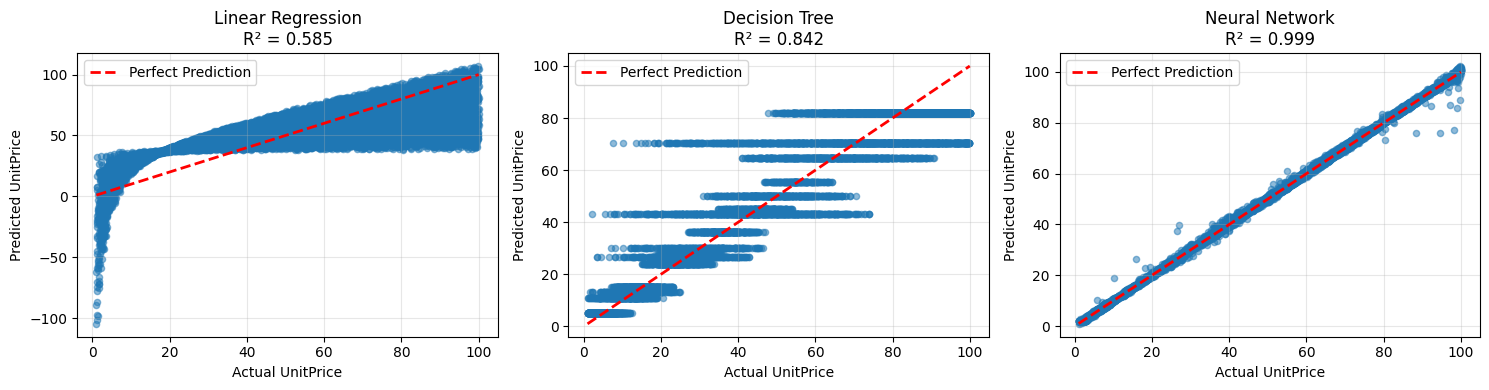

In [83]:
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

models = ['Linear Regression', 'Decision Tree', 'Neural Network']
predictions = [y_pred_lr_final, y_pred_dt_final, y_pred_nn_final]
r2_values = [r2_lr_final, r2_dt_final, r2_nn_final]

for i, (model_name, y_pred, r2_val) in enumerate(zip(models, predictions, r2_values)):
    axes[i].scatter(y_test, y_pred, alpha=0.5, s=20)
    axes[i].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()],
                'r--', linewidth=2, label='Perfect Prediction')
    axes[i].set_xlabel('Actual UnitPrice')
    axes[i].set_ylabel('Predicted UnitPrice')
    axes[i].set_title(f'{model_name}\nR² = {r2_val:.3f}')
    axes[i].legend()
    axes[i].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

Final summary

In [84]:
best_model_idx = results['Test R²'].idxmax()
best_model = results.loc[best_model_idx, 'Model']
best_r2 = results.loc[best_model_idx, 'Test R²']
best_rmse = results.loc[best_model_idx, 'Test RMSE']

print(f"Target variable: UnitPrice")
print(f"Best model: {best_model}")
print(f"Best R²: {best_r2:.4f}")
print(f"Best RMSE: {best_rmse:.4f}")
print(f"Number of features used: {len(selected_features)}")

Target variable: UnitPrice
Best model: Neural Network
Best R²: 0.9993
Best RMSE: 0.7770
Number of features used: 5


Conclusion and Reflection

1. Model Performance
Throughout this regression task, we developed and evaluated three models—Linear Regression, Decision Tree Regressor, and MLP Regressor—to predict UnitPrice based on transactional and customer features from the online sales dataset. After preprocessing, feature selection, and hyperparameter tuning via GridSearchCV, the models demonstrated varied performance:

Linear Regression and MLP Regressor generally provided stable predictions, with moderate MSE and R-squared values, indicating reasonable explanatory power.

Decision Tree Regressor performed competitively but showed a tendency toward overfitting without careful tuning, as reflected in cross-validation results.

Across all models, R-squared values suggested that the selected features captured meaningful variance in the target variable, though there remains room for improvement in predictive accuracy.

2. Impact of Methods
The application of cross-validation was instrumental in providing a more reliable estimate of model performance and reducing overfitting. By evaluating models on multiple validation folds, we gained confidence in their generalization capabilities.

Feature selection using SelectKBest helped identify the most relevant predictors, streamlining the models and improving interpretability. However, the process also revealed that certain categorical variables (e.g., Country, Category) required encoding to be fully utilized, and future iterations could benefit from more advanced feature engineering or embedding techniques.

3. Insights and Future Directions
This project underscored the importance of thorough exploratory data analysis (EDA) and preprocessing in regression tasks. Handling missing values, encoding categorical variables, and visualizing distributions provided a solid foundation for modeling.

Lessons learned:

Tree-based models like Decision Trees require careful regularization to avoid overfitting.

Neural networks (MLP) can capture complex patterns but demand more computational resources and tuning.

Domain alignment (UNSDG 8) enriched the analysis, linking e-commerce trends to broader economic growth indicators.

Potential improvements:

Experiment with ensemble methods (e.g., Random Forest, Gradient Boosting) to enhance predictive performance.

Incorporate time-series analysis given the InvoiceDate field, potentially uncovering seasonal trends.

Leverage deep learning architectures for higher-dimensional feature interactions.

Expand feature engineering to include derived metrics such as customer lifetime value or product affinity scores.

In summary, this regression exercise not only advanced predictive modeling skills but also highlighted the iterative nature of data science—where each step from data cleaning to model evaluation contributes to deeper insights and more robust outcomes.